In [1]:
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature 


%matplotlib inline

In [5]:
f = open('basicStatTextASCAT_errRmvd.txt')
metaData = []
for l in f:
    metaData.append(l.rstrip().split('|'))

In [6]:
headers = ['Date Range', 
           'lat', 
           'lon',
           '', 
           'mean speed diff', 
           'std. dev. speed diff', 
           'corr. speed', 
           '',
           'mean direction diff', 
           'std. dev. direction diff', 
           'corr. direction' ]

df = pd.DataFrame(metaData, columns=headers)

convert_dict = {'Date Range':str, 
           'lat':float, 
           'lon':float,
           'mean speed diff':float, 
           'std. dev. speed diff':float, 
           'corr. speed':float, 
           'mean direction diff':float, 
           'std. dev. direction diff':float, 
           'corr. direction':float }

df = df.astype(convert_dict)

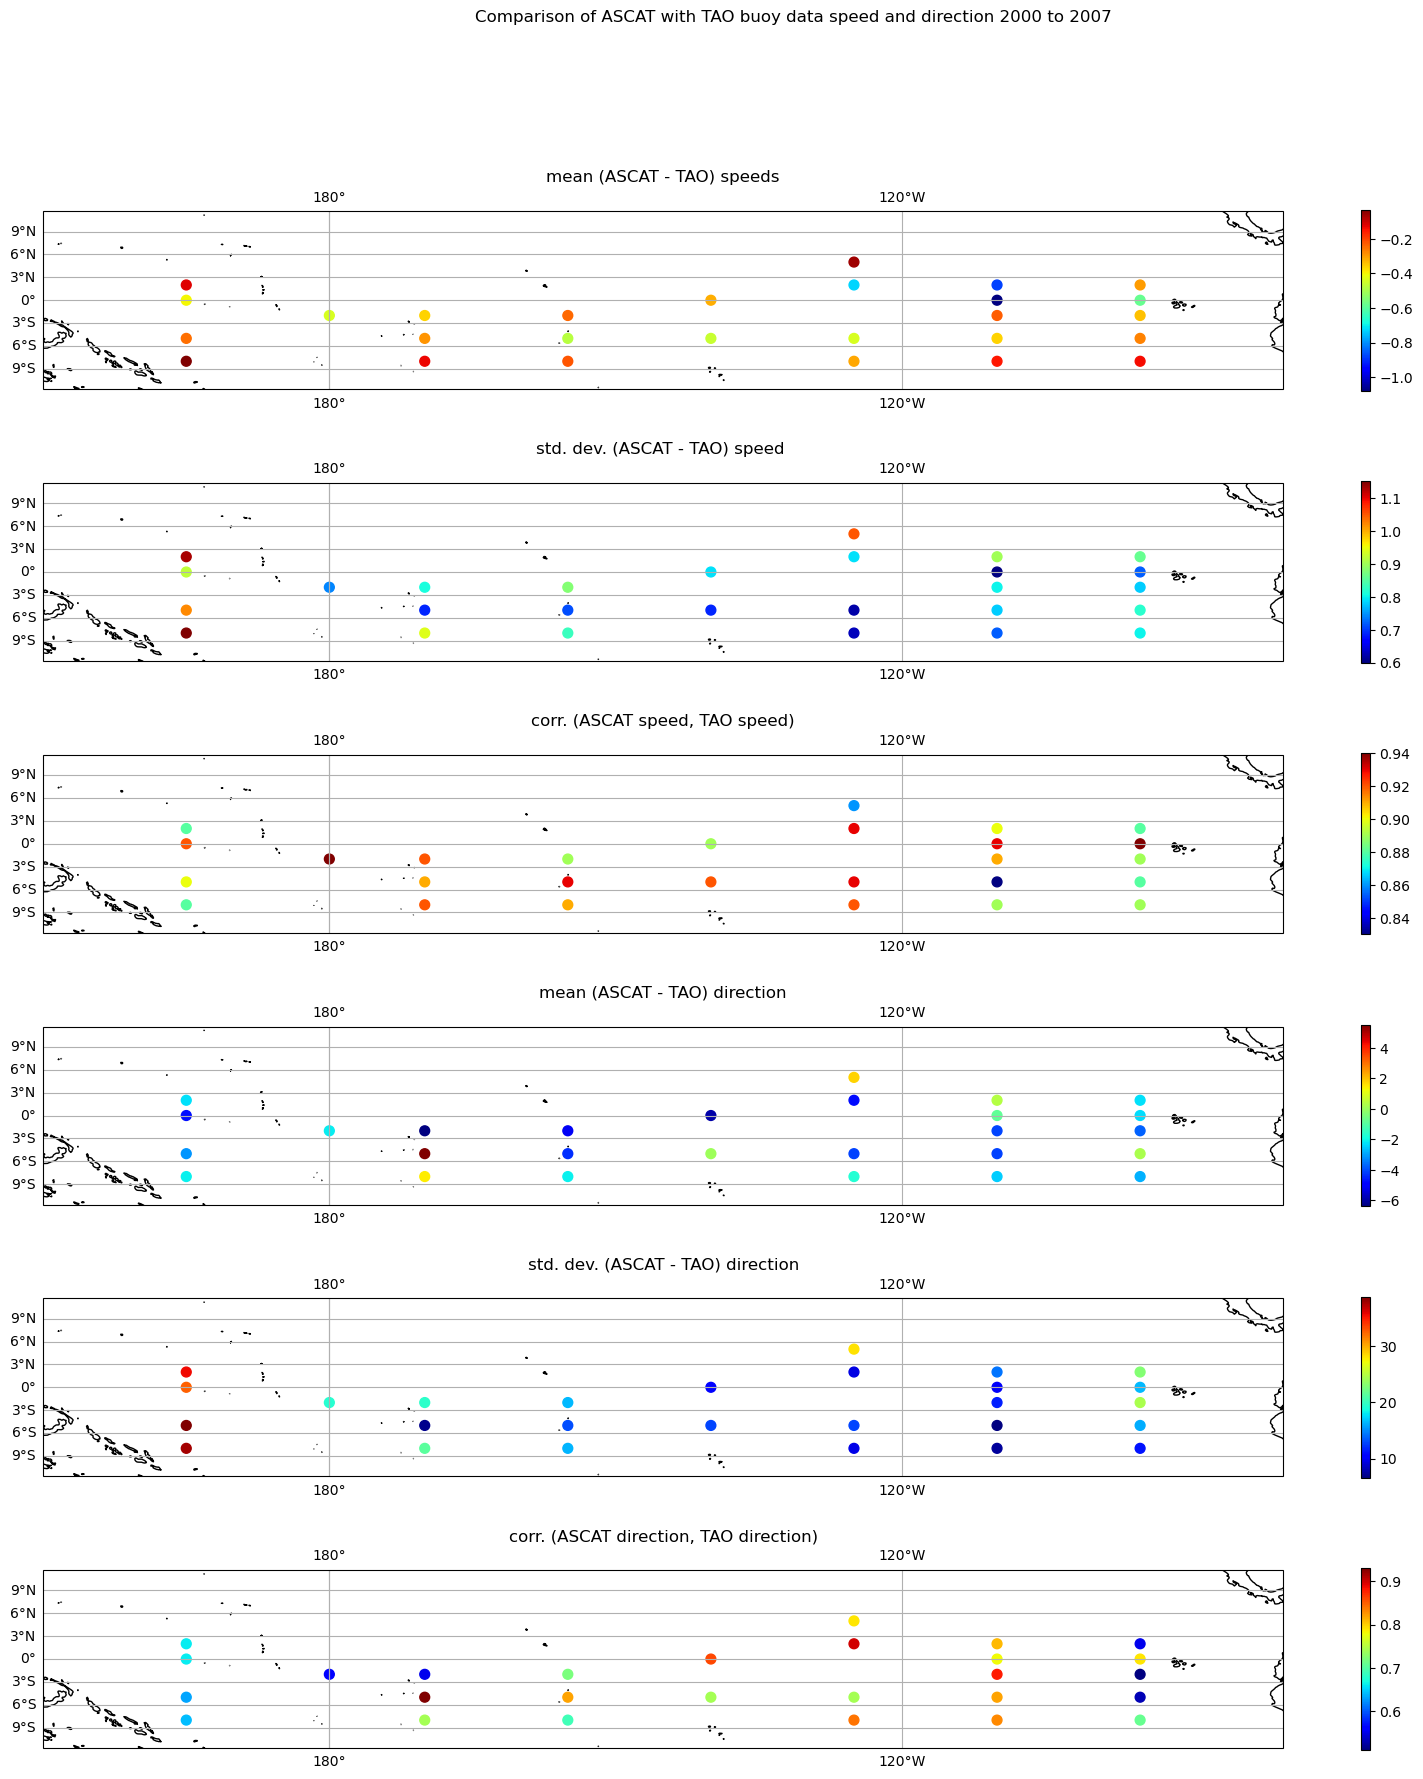

In [7]:
fig, axes = plt.subplots(nrows = 6, 
                         ncols =1, 
                         figsize = (20,20),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180), "aspect": 0.8},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

##########################################################################
ax = axes[0]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['mean speed diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('mean (ASCAT - TAO) speeds')

##########################################################################
ax = axes[1]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['std. dev. speed diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('std. dev. (ASCAT - TAO) speed ')

##########################################################################
ax = axes[2]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['corr. speed'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('corr. (ASCAT speed, TAO speed)')

##########################################################################
##########################################################################
ax = axes[3]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['mean direction diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('mean (ASCAT - TAO) direction')

##########################################################################
ax = axes[4]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['std. dev. direction diff'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('std. dev. (ASCAT - TAO) direction')

##########################################################################
ax = axes[5]
ax.set_extent([150, -80, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
s = ax.scatter((360+df['lon'])%360, 
                df['lat'], 
                s= 50, 
                c=df['corr. direction'].to_numpy(), 
                cmap='jet',
                transform=ccrs.PlateCarree())
plt.colorbar(s)
ax.coastlines()
ax.set_title('corr. (ASCAT direction, TAO direction)')

##########################################################################
plt.suptitle('Comparison of ASCAT with TAO buoy data speed and direction 2000 to 2007')
plt.savefig('images/ASCATcomp/My_Basic_Statistic_errRmvd.png', dpi=100)
